<a href="https://colab.research.google.com/github/ehlatham/PUS2022_ELathamGray/blob/main/HW6/Latham_Gray_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paper Introduction 

This paper puts forth methods of showing cities the savings potention for programs that reduce carbon emissions from buildings. These are called benchmarking programs. The author uses both lasso regression (which can be generalized for other linear models) and random forrest (which can capture non-linear elements through it's hierarchial process).

For this paper I will be comparing Washington DC and Philadelphia 



# Importing libraries and data (Philadelphia & Washington DC)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [42]:
import pylab as plt

SyntaxError: ignored

In [3]:
philly = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/master/Philadelphia/philly_final.csv")

In [4]:
washdc = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/master/DC/DC_final.csv")

# Inspecting the dataframes

In [5]:
print("there are (rows, columns) = ", (philly.shape), "in the dataframe")

there are (rows, columns) =  (1477, 41) in the dataframe


In [6]:
print("there are (rows, columns) = ", (washdc.shape), "in the dataframe")

there are (rows, columns) =  (1455, 23) in the dataframe


In [7]:
philly.describe()

Unnamed: 0  num_buildings   year_built  floor_area_total_SF  \
count  1477.000000    1477.000000  1477.000000         1.477000e+03   
mean    776.241029       1.817874  1960.196344         2.275006e+05   
std     452.599418       5.974653    36.907717         5.177257e+05   
min       1.000000       1.000000  1732.000000         1.076400e+04   
25%     378.000000       1.000000  1929.000000         7.194500e+04   
50%     776.000000       1.000000  1966.000000         1.100000e+05   
75%    1173.000000       1.000000  1990.000000         2.270000e+05   
max    1554.000000     180.000000  2016.000000         1.435000e+07   

       h2o_use_allsources_KGAL       SALE_PR            MV        TX_LND  \
count             1.477000e+03  1.477000e+03  1.477000e+03  1.477000e+03   
mean              1.028662e+04  3.660565e+06  1.659926e+07  1.472755e+06   
std               7.772411e+04  1.424398e+07  2.881769e+07  3.453353e+06   
min               0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%               7.029000e+02  1.000000e+00  3.013900e+06  0.000000e+00   
50%               2.115100e+03  4.000000e+00  7.371400e+06  2.108300e+05   
75%               5.834800e+03  1.575000e+06  1.675000e+07  1.319688e+06   
max               2.126708e+06  1.835000e+08  2.470000e+08  3.592500e+07   

            TX_BLDG      XMPT_LND  ...  TOT_LIV_AREA  building_value  \
count  1.477000e+03  1.477000e+03  ...  1.477000e+03    1.477000e+03   
mean   6.406176e+06  1.504248e+06  ...  1.535198e+05    1.378106e+07   
std    1.886449e+07  6.866733e+06  ...  1.976549e+05    2.514271e+07   
min    0.000000e+00  0.000000e+00  ...  0.000000e+00    0.000000e+00   
25%    0.000000e+00  0.000000e+00  ...  5.682800e+04    2.000000e+06   
50%    4.528000e+05  0.000000e+00  ...  9.009000e+04    5.340400e+06   
75%    4.623057e+06  9.268000e+05  ...  1.722000e+05    1.322210e+07   
max    2.169296e+08  1.916513e+08  ...  2.215704e+06    2.169296e+08   

       value_per_SF  electricity_use_KBTU  energy_star_score  site_eui_KBTUSF  \
count   1477.000000          1.468000e+03        1077.000000      1477.000000   
mean      76.472908          1.034643e+07          59.208914        76.384428   
std      125.973494          3.740089e+07          29.980012        56.227855   
min        0.000000          2.813500e+03           1.000000         1.200000   
25%       18.180223          1.487758e+06          37.000000        41.900000   
50%       44.386263          3.629641e+06          64.000000        64.600000   
75%       95.764626          9.053458e+06          85.000000        94.200000   
max     1789.785714          1.016449e+09         100.000000       311.800000   

       source_eui_KBTUSF  total_ghg_emissions_MTCO2e  total_site_energy_KBTU  \
count        1477.000000                 1477.000000            1.477000e+03   
mean          167.149966                 1683.624712            2.129362e+07   
std           128.704973                 7217.104943            1.001570e+08   
min             3.000000                    9.500000            8.160000e+04   
25%            90.200000                  311.700000            3.912300e+06   
50%           136.400000                  621.500000            7.334257e+06   
75%           208.300000                 1409.700000            1.745820e+07   
max           868.300000               228210.300000            2.981930e+09   

       log_total_site_energy_KBTU  
count                 1477.000000  
mean                    15.873690  
std                      1.291294  
min                     11.309585  
25%                     15.179636  
50%                     15.808067  
75%                     16.675320  
max                     21.815837  

[8 rows x 35 columns]

In [8]:
washdc.describe()

Unnamed: 0         ward   year_built  tax_record_floor_area  \
count  1455.000000  1455.000000  1455.000000           1.455000e+03   
mean    793.997938     3.472852  1940.804811           2.046748e+05   
std     469.582655     2.047691   167.230361           2.451302e+05   
min       1.000000     1.000000  1000.000000           9.171000e+03   
25%     380.500000     2.000000  1947.000000           7.164000e+04   
50%     794.000000     2.000000  1971.000000           1.287720e+05   
75%    1176.500000     5.000000  1994.000000           2.585310e+05   
max    2181.000000     8.000000  2017.000000           3.997572e+06   

       reported_gross_floor_area     water_use  electricity_use  \
count               1.455000e+03  1.455000e+03     1.441000e+03   
mean                1.897612e+05  5.109905e+04     2.760114e+06   
std                 2.436786e+05  6.163321e+05     4.599984e+06   
min                 9.171000e+03  0.000000e+00     1.785000e+02   
25%                 7.111750e+04  1.958050e+03     7.435930e+05   
50%                 1.215530e+05  4.063800e+03     1.612028e+06   
75%                 2.372130e+05  7.008700e+03     3.386553e+06   
max                 5.634890e+06  1.929391e+07     1.207430e+08   

       natural_gas_use  energy_star_score     site_eui  weather_norm_site_eui  \
count     1.054000e+03        1184.000000  1455.000000            1393.000000   
mean      5.853217e+04          62.090372    69.960206              70.745154   
std       2.617060e+05          26.792483    30.676317              31.476591   
min       0.000000e+00           1.000000     1.100000               1.100000   
25%       1.121760e+04          43.750000    51.600000              51.900000   
50%       2.770698e+04          70.000000    65.900000              66.600000   
75%       5.154631e+04          84.000000    82.850000              84.500000   
max       7.269109e+06         100.000000   213.600000             215.500000   

        source_eui  weather_norm_source_eui  total_ghg_emissions  \
count  1455.000000              1393.000000          1454.000000   
mean    171.274433               171.302872          1318.734388   
std      76.707287                76.884877          2458.471157   
min       1.200000                 1.200000             3.100000   
25%     121.850000               121.600000           400.450000   
50%     163.300000               163.400000           757.100000   
75%     206.450000               207.400000          1534.450000   
max     618.600000               620.600000         64992.500000   

       total_ghg_emissions_intensity  total_site_energy_KBTU  \
count                    1454.000000            1.455000e+03   
mean                        6.674278            1.344870e+07   
std                         3.143349            2.843799e+07   
min                         0.100000            5.729350e+04   
25%                         4.800000            4.513227e+06   
50%                         6.300000            8.156027e+06   
75%                         7.800000            1.565570e+07   
max                        30.600000            7.832497e+08   

       log_total_site_energy_KBTU  
count                 1455.000000  
mean                    15.905810  
std                      0.991320  
min                     10.955942  
25%                     15.322523  
50%                     15.914268  
75%                     16.566343  
max                     20.478962

# Cleaning the data

In [9]:
#finding rows with missing values
for c in philly.columns:
  
  # count number of rows with missing values
  n_miss = philly[c].isnull().sum()
  perc = n_miss / philly.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, philly[c].dtype, 
                                                  n_miss, perc))

Unnamed: 0 (int64):  Missing: 0 (0.0%)
num_buildings (int64):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
property_type_primary_epa (object):  Missing: 0 (0.0%)
floor_area_total_SF (float64):  Missing: 0 (0.0%)
h2o_use_allsources_KGAL (float64):  Missing: 0 (0.0%)
SALE_PR (float64):  Missing: 0 (0.0%)
SALE_TY (object):  Missing: 0 (0.0%)
MV (float64):  Missing: 0 (0.0%)
TX_LND (float64):  Missing: 0 (0.0%)
TX_BLDG (float64):  Missing: 0 (0.0%)
XMPT_LND (float64):  Missing: 0 (0.0%)
XMPT_BLDG (float64):  Missing: 0 (0.0%)
CAT_CD (int64):  Missing: 0 (0.0%)
ZONE (object):  Missing: 0 (0.0%)
FRT (float64):  Missing: 0 (0.0%)
DPT (int64):  Missing: 0 (0.0%)
TOT_AREA (float64):  Missing: 0 (0.0%)
TOP (object):  Missing: 0 (0.0%)
GRG_TYP (object):  Missing: 0 (0.0%)
GRG_SP (int64):  Missing: 0 (0.0%)
OFF_ST (int64):  Missing: 0 (0.0%)
VIEW_ (object):  Missing: 0 (0.0%)
STORIES (int64):  Missing: 0 (0.0%)
EXT_COND (int64):  Missing: 0 (0.0%)
NO_RM (int64):  Missing: 0 (0.0%)
NO_

In [10]:
#finding the rows with missing values
for c in washdc.columns:
  
  # count number of rows with missing values
  n_miss = washdc[c].isnull().sum()
  perc = n_miss / washdc.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, washdc[c].dtype, 
                                                  n_miss, perc))

Unnamed: 0 (int64):  Missing: 0 (0.0%)
report_status (object):  Missing: 0 (0.0%)
ward (int64):  Missing: 0 (0.0%)
postal_code (object):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
primary_ptype_self (object):  Missing: 0 (0.0%)
primary_ptype_epa (object):  Missing: 0 (0.0%)
tax_record_floor_area (float64):  Missing: 0 (0.0%)
reported_gross_floor_area (float64):  Missing: 0 (0.0%)
water_use (float64):  Missing: 0 (0.0%)
metered_areas_energy (object):  Missing: 0 (0.0%)
metered_areas_water (object):  Missing: 0 (0.0%)
electricity_use (float64):  Missing: 14 (1.0%)
natural_gas_use (float64):  Missing: 401 (27.6%)
energy_star_score (float64):  Missing: 271 (18.6%)
site_eui (float64):  Missing: 0 (0.0%)
weather_norm_site_eui (float64):  Missing: 62 (4.3%)
source_eui (float64):  Missing: 0 (0.0%)
weather_norm_source_eui (float64):  Missing: 62 (4.3%)
total_ghg_emissions (float64):  Missing: 1 (0.1%)
total_ghg_emissions_intensity (float64):  Missing: 1 (0.1%)
total_site_energy_

In [11]:
#Counting the rows with missing values
#I think it's showing the same amount though
for c in philly.columns:
  
  # count number of rows with missing values
  n_miss = philly[c].isnull().sum()
  perc = n_miss / philly.shape[0] * 100
  if perc > 40:
    philly.drop(c, axis=1, inplace=True)


print("there are (rows, columns) = ", (philly.shape), "in the dataframe")

there are (rows, columns) =  (1477, 41) in the dataframe


In [12]:
for c in washdc.columns:
  
  # count number of rows with missing values
  n_miss = washdc[c].isnull().sum()
  perc = n_miss / washdc.shape[0] * 100
  if perc > 40:
    washdc.drop(c, axis=1, inplace=True)


print("there are (rows, columns) = ", (washdc.shape), "in the dataframe")

there are (rows, columns) =  (1455, 23) in the dataframe


In [13]:
for c in philly.columns:
  
  # count number of rows with missing values
  n_miss = philly[c].isnull().sum()
  perc = n_miss / philly.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, philly[c].dtype, 
                                                  n_miss, perc))

Unnamed: 0 (int64):  Missing: 0 (0.0%)
num_buildings (int64):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
property_type_primary_epa (object):  Missing: 0 (0.0%)
floor_area_total_SF (float64):  Missing: 0 (0.0%)
h2o_use_allsources_KGAL (float64):  Missing: 0 (0.0%)
SALE_PR (float64):  Missing: 0 (0.0%)
SALE_TY (object):  Missing: 0 (0.0%)
MV (float64):  Missing: 0 (0.0%)
TX_LND (float64):  Missing: 0 (0.0%)
TX_BLDG (float64):  Missing: 0 (0.0%)
XMPT_LND (float64):  Missing: 0 (0.0%)
XMPT_BLDG (float64):  Missing: 0 (0.0%)
CAT_CD (int64):  Missing: 0 (0.0%)
ZONE (object):  Missing: 0 (0.0%)
FRT (float64):  Missing: 0 (0.0%)
DPT (int64):  Missing: 0 (0.0%)
TOT_AREA (float64):  Missing: 0 (0.0%)
TOP (object):  Missing: 0 (0.0%)
GRG_TYP (object):  Missing: 0 (0.0%)
GRG_SP (int64):  Missing: 0 (0.0%)
OFF_ST (int64):  Missing: 0 (0.0%)
VIEW_ (object):  Missing: 0 (0.0%)
STORIES (int64):  Missing: 0 (0.0%)
EXT_COND (int64):  Missing: 0 (0.0%)
NO_RM (int64):  Missing: 0 (0.0%)
NO_

In [14]:
for c in washdc.columns:
  
  # count number of rows with missing values
  n_miss = washdc[c].isnull().sum()
  perc = n_miss / washdc.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, washdc[c].dtype, 
                                                  n_miss, perc))

Unnamed: 0 (int64):  Missing: 0 (0.0%)
report_status (object):  Missing: 0 (0.0%)
ward (int64):  Missing: 0 (0.0%)
postal_code (object):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
primary_ptype_self (object):  Missing: 0 (0.0%)
primary_ptype_epa (object):  Missing: 0 (0.0%)
tax_record_floor_area (float64):  Missing: 0 (0.0%)
reported_gross_floor_area (float64):  Missing: 0 (0.0%)
water_use (float64):  Missing: 0 (0.0%)
metered_areas_energy (object):  Missing: 0 (0.0%)
metered_areas_water (object):  Missing: 0 (0.0%)
electricity_use (float64):  Missing: 14 (1.0%)
natural_gas_use (float64):  Missing: 401 (27.6%)
energy_star_score (float64):  Missing: 271 (18.6%)
site_eui (float64):  Missing: 0 (0.0%)
weather_norm_site_eui (float64):  Missing: 62 (4.3%)
source_eui (float64):  Missing: 0 (0.0%)
weather_norm_source_eui (float64):  Missing: 62 (4.3%)
total_ghg_emissions (float64):  Missing: 1 (0.1%)
total_ghg_emissions_intensity (float64):  Missing: 1 (0.1%)
total_site_energy_

# Transform input feature as needed

In [15]:
philly.describe()

Unnamed: 0  num_buildings   year_built  floor_area_total_SF  \
count  1477.000000    1477.000000  1477.000000         1.477000e+03   
mean    776.241029       1.817874  1960.196344         2.275006e+05   
std     452.599418       5.974653    36.907717         5.177257e+05   
min       1.000000       1.000000  1732.000000         1.076400e+04   
25%     378.000000       1.000000  1929.000000         7.194500e+04   
50%     776.000000       1.000000  1966.000000         1.100000e+05   
75%    1173.000000       1.000000  1990.000000         2.270000e+05   
max    1554.000000     180.000000  2016.000000         1.435000e+07   

       h2o_use_allsources_KGAL       SALE_PR            MV        TX_LND  \
count             1.477000e+03  1.477000e+03  1.477000e+03  1.477000e+03   
mean              1.028662e+04  3.660565e+06  1.659926e+07  1.472755e+06   
std               7.772411e+04  1.424398e+07  2.881769e+07  3.453353e+06   
min               0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%               7.029000e+02  1.000000e+00  3.013900e+06  0.000000e+00   
50%               2.115100e+03  4.000000e+00  7.371400e+06  2.108300e+05   
75%               5.834800e+03  1.575000e+06  1.675000e+07  1.319688e+06   
max               2.126708e+06  1.835000e+08  2.470000e+08  3.592500e+07   

            TX_BLDG      XMPT_LND  ...  TOT_LIV_AREA  building_value  \
count  1.477000e+03  1.477000e+03  ...  1.477000e+03    1.477000e+03   
mean   6.406176e+06  1.504248e+06  ...  1.535198e+05    1.378106e+07   
std    1.886449e+07  6.866733e+06  ...  1.976549e+05    2.514271e+07   
min    0.000000e+00  0.000000e+00  ...  0.000000e+00    0.000000e+00   
25%    0.000000e+00  0.000000e+00  ...  5.682800e+04    2.000000e+06   
50%    4.528000e+05  0.000000e+00  ...  9.009000e+04    5.340400e+06   
75%    4.623057e+06  9.268000e+05  ...  1.722000e+05    1.322210e+07   
max    2.169296e+08  1.916513e+08  ...  2.215704e+06    2.169296e+08   

       value_per_SF  electricity_use_KBTU  energy_star_score  site_eui_KBTUSF  \
count   1477.000000          1.468000e+03        1077.000000      1477.000000   
mean      76.472908          1.034643e+07          59.208914        76.384428   
std      125.973494          3.740089e+07          29.980012        56.227855   
min        0.000000          2.813500e+03           1.000000         1.200000   
25%       18.180223          1.487758e+06          37.000000        41.900000   
50%       44.386263          3.629641e+06          64.000000        64.600000   
75%       95.764626          9.053458e+06          85.000000        94.200000   
max     1789.785714          1.016449e+09         100.000000       311.800000   

       source_eui_KBTUSF  total_ghg_emissions_MTCO2e  total_site_energy_KBTU  \
count        1477.000000                 1477.000000            1.477000e+03   
mean          167.149966                 1683.624712            2.129362e+07   
std           128.704973                 7217.104943            1.001570e+08   
min             3.000000                    9.500000            8.160000e+04   
25%            90.200000                  311.700000            3.912300e+06   
50%           136.400000                  621.500000            7.334257e+06   
75%           208.300000                 1409.700000            1.745820e+07   
max           868.300000               228210.300000            2.981930e+09   

       log_total_site_energy_KBTU  
count                 1477.000000  
mean                    15.873690  
std                      1.291294  
min                     11.309585  
25%                     15.179636  
50%                     15.808067  
75%                     16.675320  
max                     21.815837  

[8 rows x 35 columns]

In [16]:
philly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1477 non-null   int64  
 1   num_buildings               1477 non-null   int64  
 2   year_built                  1477 non-null   int64  
 3   property_type_primary_epa   1477 non-null   object 
 4   floor_area_total_SF         1477 non-null   float64
 5   h2o_use_allsources_KGAL     1477 non-null   float64
 6   SALE_PR                     1477 non-null   float64
 7   SALE_TY                     1477 non-null   object 
 8   MV                          1477 non-null   float64
 9   TX_LND                      1477 non-null   float64
 10  TX_BLDG                     1477 non-null   float64
 11  XMPT_LND                    1477 non-null   float64
 12  XMPT_BLDG                   1477 non-null   float64
 13  CAT_CD                      1477 

In [17]:
washdc.describe()

Unnamed: 0         ward   year_built  tax_record_floor_area  \
count  1455.000000  1455.000000  1455.000000           1.455000e+03   
mean    793.997938     3.472852  1940.804811           2.046748e+05   
std     469.582655     2.047691   167.230361           2.451302e+05   
min       1.000000     1.000000  1000.000000           9.171000e+03   
25%     380.500000     2.000000  1947.000000           7.164000e+04   
50%     794.000000     2.000000  1971.000000           1.287720e+05   
75%    1176.500000     5.000000  1994.000000           2.585310e+05   
max    2181.000000     8.000000  2017.000000           3.997572e+06   

       reported_gross_floor_area     water_use  electricity_use  \
count               1.455000e+03  1.455000e+03     1.441000e+03   
mean                1.897612e+05  5.109905e+04     2.760114e+06   
std                 2.436786e+05  6.163321e+05     4.599984e+06   
min                 9.171000e+03  0.000000e+00     1.785000e+02   
25%                 7.111750e+04  1.958050e+03     7.435930e+05   
50%                 1.215530e+05  4.063800e+03     1.612028e+06   
75%                 2.372130e+05  7.008700e+03     3.386553e+06   
max                 5.634890e+06  1.929391e+07     1.207430e+08   

       natural_gas_use  energy_star_score     site_eui  weather_norm_site_eui  \
count     1.054000e+03        1184.000000  1455.000000            1393.000000   
mean      5.853217e+04          62.090372    69.960206              70.745154   
std       2.617060e+05          26.792483    30.676317              31.476591   
min       0.000000e+00           1.000000     1.100000               1.100000   
25%       1.121760e+04          43.750000    51.600000              51.900000   
50%       2.770698e+04          70.000000    65.900000              66.600000   
75%       5.154631e+04          84.000000    82.850000              84.500000   
max       7.269109e+06         100.000000   213.600000             215.500000   

        source_eui  weather_norm_source_eui  total_ghg_emissions  \
count  1455.000000              1393.000000          1454.000000   
mean    171.274433               171.302872          1318.734388   
std      76.707287                76.884877          2458.471157   
min       1.200000                 1.200000             3.100000   
25%     121.850000               121.600000           400.450000   
50%     163.300000               163.400000           757.100000   
75%     206.450000               207.400000          1534.450000   
max     618.600000               620.600000         64992.500000   

       total_ghg_emissions_intensity  total_site_energy_KBTU  \
count                    1454.000000            1.455000e+03   
mean                        6.674278            1.344870e+07   
std                         3.143349            2.843799e+07   
min                         0.100000            5.729350e+04   
25%                         4.800000            4.513227e+06   
50%                         6.300000            8.156027e+06   
75%                         7.800000            1.565570e+07   
max                        30.600000            7.832497e+08   

       log_total_site_energy_KBTU  
count                 1455.000000  
mean                    15.905810  
std                      0.991320  
min                     10.955942  
25%                     15.322523  
50%                     15.914268  
75%                     16.566343  
max                     20.478962

In [18]:
washdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1455 non-null   int64  
 1   report_status                  1455 non-null   object 
 2   ward                           1455 non-null   int64  
 3   postal_code                    1455 non-null   object 
 4   year_built                     1455 non-null   int64  
 5   primary_ptype_self             1455 non-null   object 
 6   primary_ptype_epa              1455 non-null   object 
 7   tax_record_floor_area          1455 non-null   float64
 8   reported_gross_floor_area      1455 non-null   float64
 9   water_use                      1455 non-null   float64
 10  metered_areas_energy           1455 non-null   object 
 11  metered_areas_water            1455 non-null   object 
 12  electricity_use                1441 non-null   f

In [19]:
#trying to get rid of the missing data
philly.dropna(how="any", axis=0, inplace=True)

In [20]:
#lets see if that works.... IT DID

for c in philly.columns:
  

  n_miss = philly[c].isnull().sum()
  perc = n_miss / philly.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, philly[c].dtype, 
                                                  n_miss, perc)) 

Unnamed: 0 (int64):  Missing: 0 (0.0%)
num_buildings (int64):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
property_type_primary_epa (object):  Missing: 0 (0.0%)
floor_area_total_SF (float64):  Missing: 0 (0.0%)
h2o_use_allsources_KGAL (float64):  Missing: 0 (0.0%)
SALE_PR (float64):  Missing: 0 (0.0%)
SALE_TY (object):  Missing: 0 (0.0%)
MV (float64):  Missing: 0 (0.0%)
TX_LND (float64):  Missing: 0 (0.0%)
TX_BLDG (float64):  Missing: 0 (0.0%)
XMPT_LND (float64):  Missing: 0 (0.0%)
XMPT_BLDG (float64):  Missing: 0 (0.0%)
CAT_CD (int64):  Missing: 0 (0.0%)
ZONE (object):  Missing: 0 (0.0%)
FRT (float64):  Missing: 0 (0.0%)
DPT (int64):  Missing: 0 (0.0%)
TOT_AREA (float64):  Missing: 0 (0.0%)
TOP (object):  Missing: 0 (0.0%)
GRG_TYP (object):  Missing: 0 (0.0%)
GRG_SP (int64):  Missing: 0 (0.0%)
OFF_ST (int64):  Missing: 0 (0.0%)
VIEW_ (object):  Missing: 0 (0.0%)
STORIES (int64):  Missing: 0 (0.0%)
EXT_COND (int64):  Missing: 0 (0.0%)
NO_RM (int64):  Missing: 0 (0.0%)
NO_

In [21]:
washdc.dropna(how="any", axis=0, inplace=True)

In [22]:
#Checkig to see what Washington will look like now that I've dropped the missing from that dataset

for c in washdc.columns:
  

  n_miss = washdc[c].isnull().sum()
  perc = n_miss / washdc.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, washdc[c].dtype, 
                                                  n_miss, perc)) 

Unnamed: 0 (int64):  Missing: 0 (0.0%)
report_status (object):  Missing: 0 (0.0%)
ward (int64):  Missing: 0 (0.0%)
postal_code (object):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
primary_ptype_self (object):  Missing: 0 (0.0%)
primary_ptype_epa (object):  Missing: 0 (0.0%)
tax_record_floor_area (float64):  Missing: 0 (0.0%)
reported_gross_floor_area (float64):  Missing: 0 (0.0%)
water_use (float64):  Missing: 0 (0.0%)
metered_areas_energy (object):  Missing: 0 (0.0%)
metered_areas_water (object):  Missing: 0 (0.0%)
electricity_use (float64):  Missing: 0 (0.0%)
natural_gas_use (float64):  Missing: 0 (0.0%)
energy_star_score (float64):  Missing: 0 (0.0%)
site_eui (float64):  Missing: 0 (0.0%)
weather_norm_site_eui (float64):  Missing: 0 (0.0%)
source_eui (float64):  Missing: 0 (0.0%)
weather_norm_source_eui (float64):  Missing: 0 (0.0%)
total_ghg_emissions (float64):  Missing: 0 (0.0%)
total_ghg_emissions_intensity (float64):  Missing: 0 (0.0%)
total_site_energy_KBTU (flo

So insa() command is to find missing variables, I've alreay dropped all the missing data, so I guess that's reflected below.

In [23]:
philly["total_site_energy_KBTU"].isna().sum()


0

In [24]:
washdc["total_site_energy_KBTU"].isna().sum()


0

In [25]:
#I cannot make this code work
#original_len = philly.shape[0]
#philly.dropna(subset=["total_site_energy_KBTU"],
        #print("I lost {:.2f}% of the data".format((1 - (philly.shape[0] / original_len)) * 100)

In [26]:
#original_len = washdc.shape[0]
#washdc.dropna(subset=['total_site_energy_KBTU'],
  #print("I lost {:.2f}% of the data".format((1 - (washdc.shape[0] / original_len)) * 100)

In [27]:
PY = philly["total_site_energy_KBTU"].values

In [28]:
PX = philly.drop("total_site_energy_KBTU", axis=1)

In [29]:
WDCY = washdc["total_site_energy_KBTU"].values

In [30]:
WDCX = washdc.drop("total_site_energy_KBTU", axis=1)

# Separate categorical and numerical values 

In [31]:
PX_numeric_data = PX.select_dtypes(include=[np.number])
PX_categorical_data = PX.select_dtypes(exclude=[np.number])

In [32]:
PX_numeric_data.shape

(1072, 34)

In [33]:
PX_numeric_data.head()

Unnamed: 0  num_buildings  year_built  floor_area_total_SF  \
0           1              1        1987            1117466.0   
1           2              1        1992            1148906.0   
2           3              1        1986             751503.0   
3           4              1        1981             721408.0   
4           5              1        1973            1178691.0   

   h2o_use_allsources_KGAL      SALE_PR           MV      TX_LND      TX_BLDG  \
0                  17093.4          1.0  178231600.0  19435800.0  158795800.0   
1                  16707.4          1.0  170101700.0  19329300.0  150772400.0   
2                  11007.6  100000000.0  100251800.0  10584000.0   89667800.0   
3                   3428.9   75000000.0   93035800.0  10800000.0   82235800.0   
4                  17363.1  154400000.0  170000000.0  10612800.0  159387200.0   

   XMPT_LND  ...  INT_COND  TOT_LIV_AREA  building_value  value_per_SF  \
0       0.0  ...         4     1152520.0     158795800.0    142.103473   
1       0.0  ...         4     1152480.0     150772400.0    131.231276   
2       0.0  ...         4      799994.0      89667800.0    119.317953   
3       0.0  ...         4      708750.0      82235800.0    113.993468   
4       0.0  ...         0     1143040.0     159387200.0    135.223905   

   electricity_use_KBTU  energy_star_score  site_eui_KBTUSF  \
0            74041355.4               83.0             72.4   
1            70118783.7               83.0             64.4   
2            37377709.4               85.0             70.7   
3            37120444.6               88.0             62.8   
4            32611646.9               95.0             52.3   

   source_eui_KBTUSF  total_ghg_emissions_MTCO2e  log_total_site_energy_KBTU  
0              227.5                      8491.0                   18.208780  
1              202.3                      8041.2                   18.119434  
2              190.5                      5028.1                   17.788276  
3              175.2                      4798.9                   17.628915  
4              126.9                      5008.6                   17.936911  

[5 rows x 34 columns]

In [34]:
PX_categorical_data.shape

(1072, 6)

In [35]:
WDCX_numeric_data = WDCX.select_dtypes(include=[np.number])
WDCX_categorical_data = WDCX.select_dtypes(exclude=[np.number])

In [36]:
WDCX_numeric_data.shape

(792, 16)

In [37]:
WDCX_numeric_data.head()

Unnamed: 0  ward  year_built  tax_record_floor_area  \
0            1     4        1959                63227.0   
2            3     2        1964               330550.0   
7            8     2        1989               606768.0   
8            9     2        1966               113547.0   
11          12     4        1949                63227.0   

    reported_gross_floor_area  water_use  electricity_use  natural_gas_use  \
0                     65000.0     6963.5         633043.8      44274.18307   
2                    223218.0     8749.1        3863003.0      64143.38666   
7                    517464.0     8321.3        9431956.0      17256.41775   
8                    322250.0     3664.5        4778129.0      53754.62856   
11                    63224.0     5168.7         266968.0      27917.56290   

    energy_star_score  site_eui  weather_norm_site_eui  source_eui  \
0                 9.0     101.3                  102.7       175.9   
2                76.0      87.8                   89.0       215.6   
7                81.0      65.5                   65.5       198.8   
8                85.0      68.0                   69.7       177.1   
11               78.0      58.6                   60.7        91.6   

    weather_norm_source_eui  total_ghg_emissions  \
0                     174.9                482.9   
2                     215.0               1852.2   
7                     198.8               3782.3   
8                     178.9               2171.8   
11                     92.9                252.7   

    total_ghg_emissions_intensity  log_total_site_energy_KBTU  
0                             7.4                   15.700229  
2                             8.3                   16.790966  
7                             7.3                   17.338745  
8                             6.7                   16.902591  
11                            4.0                   15.125174

In [38]:
WDCX_categorical_data.shape

(792, 6)

# Making the scatter plot to assess covariance of numerical values

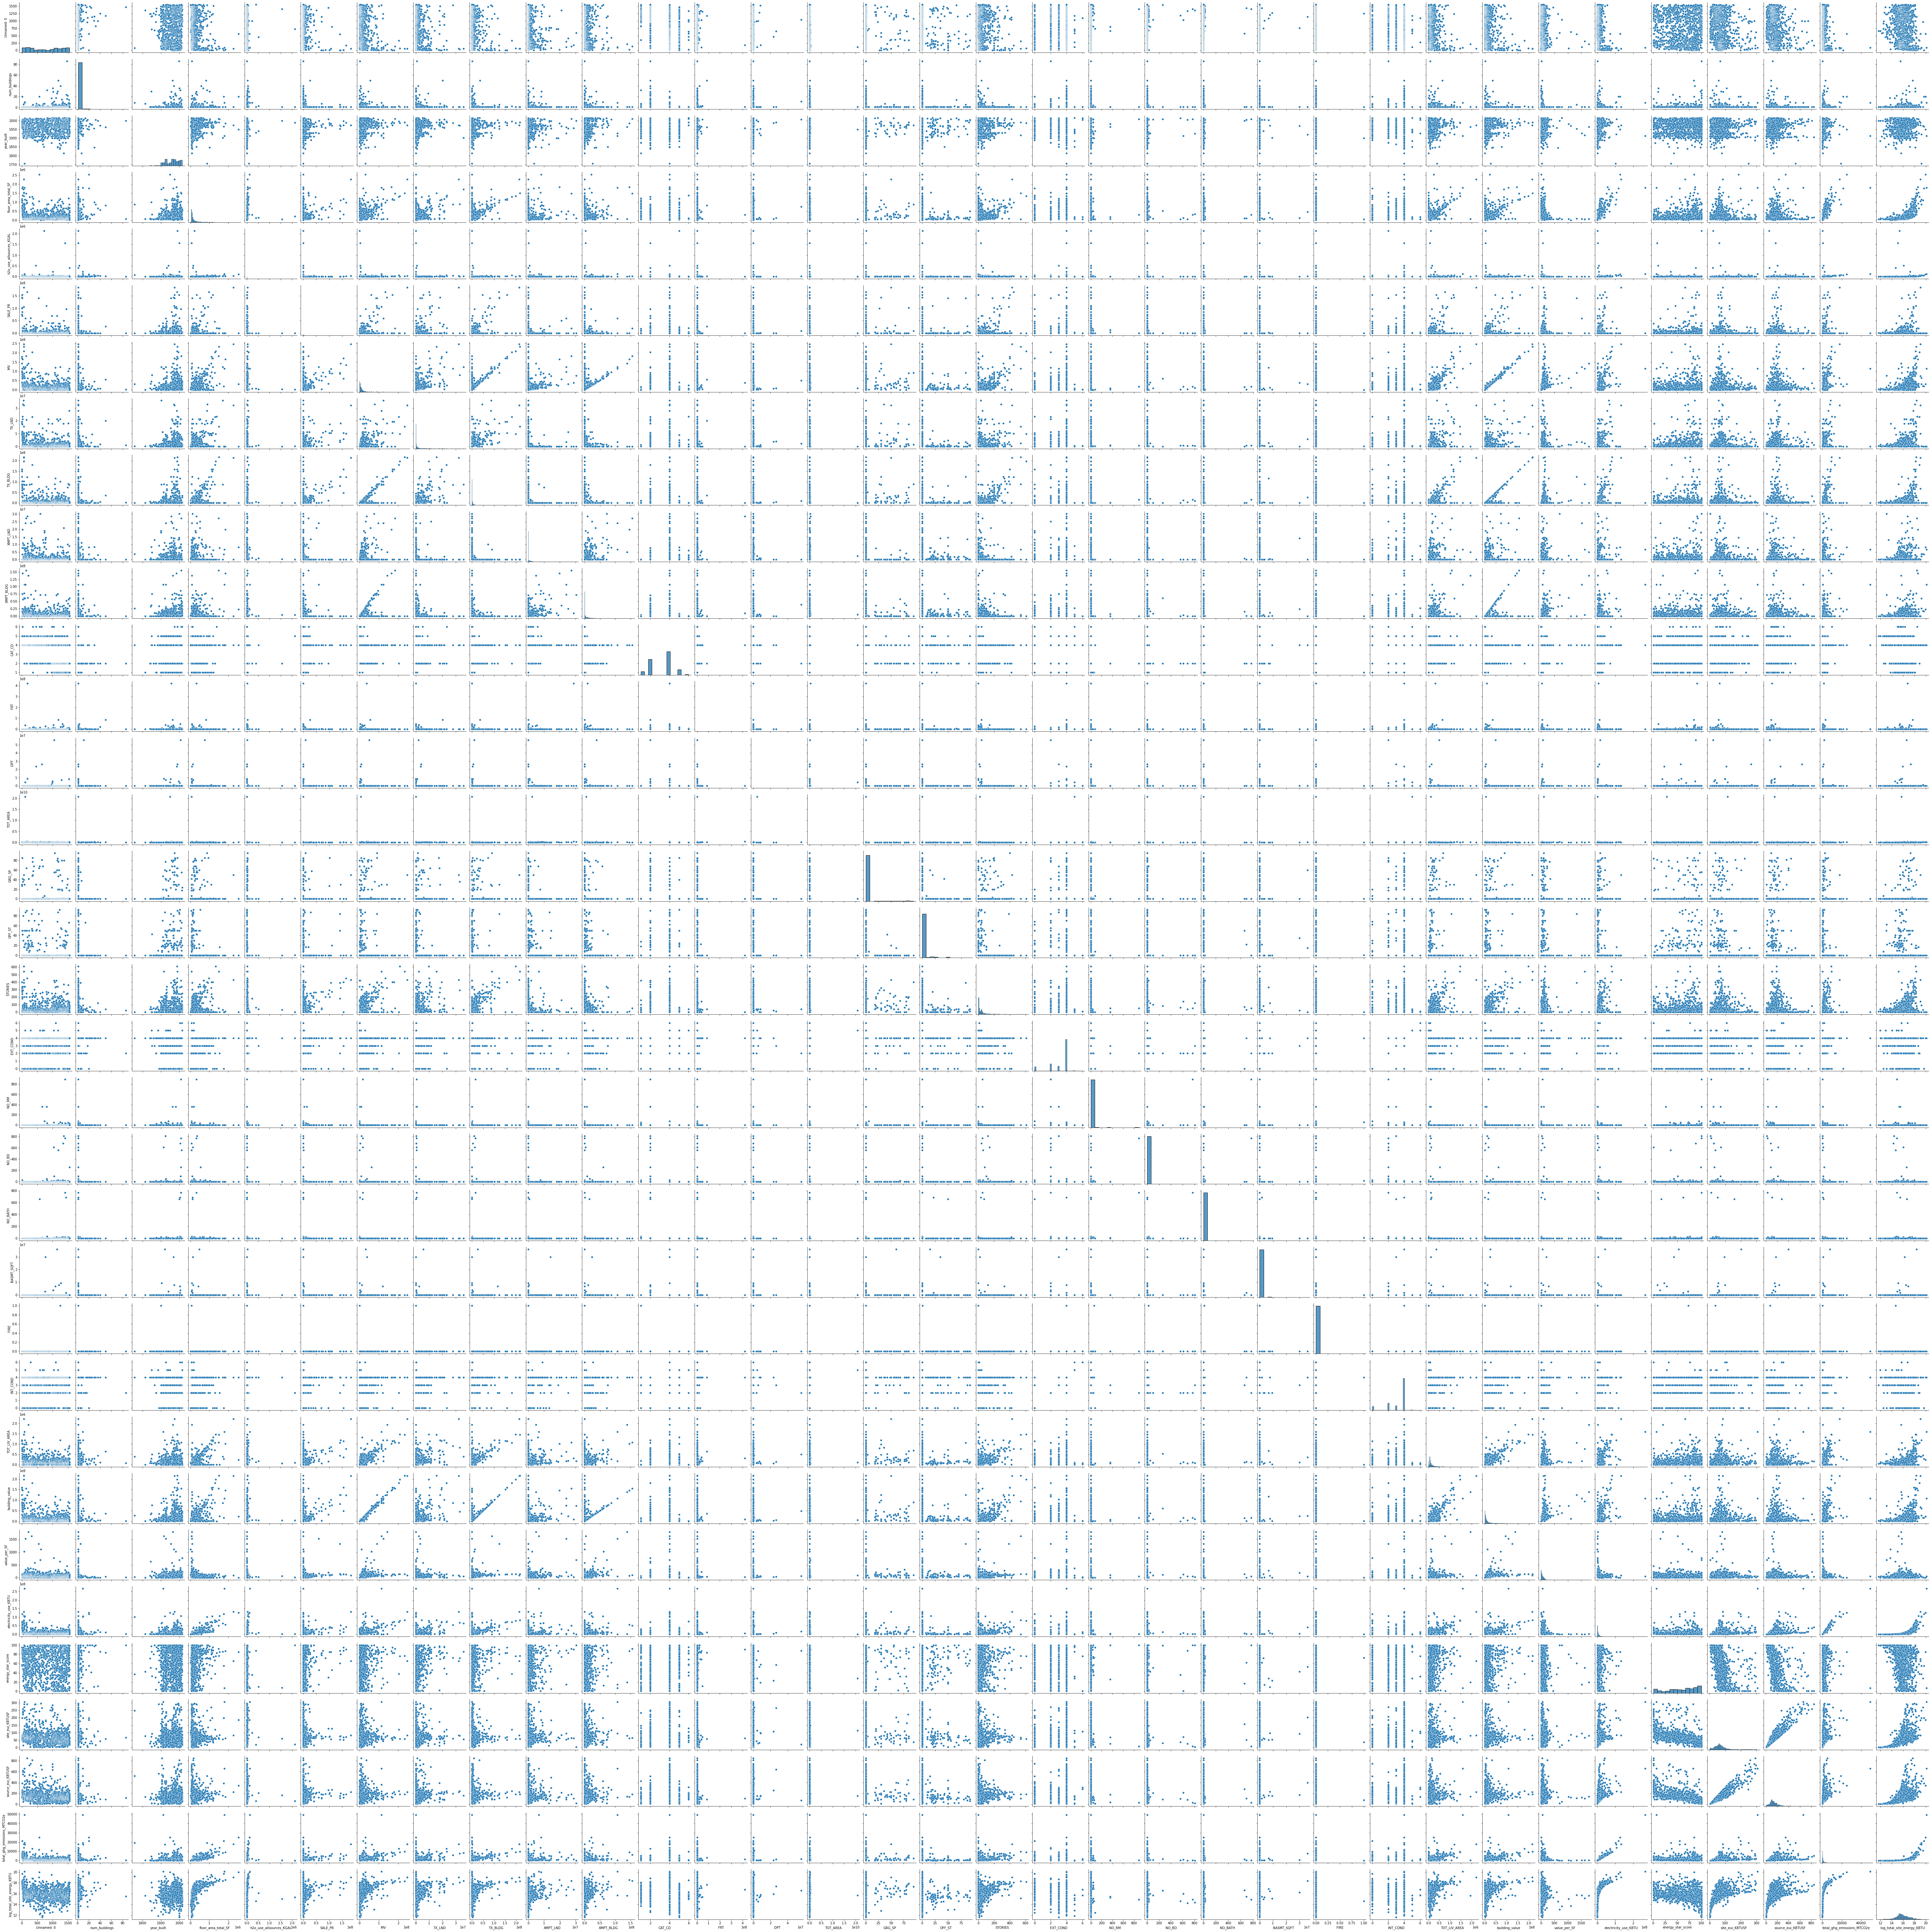

In [39]:
sns.pairplot(PX_numeric_data)

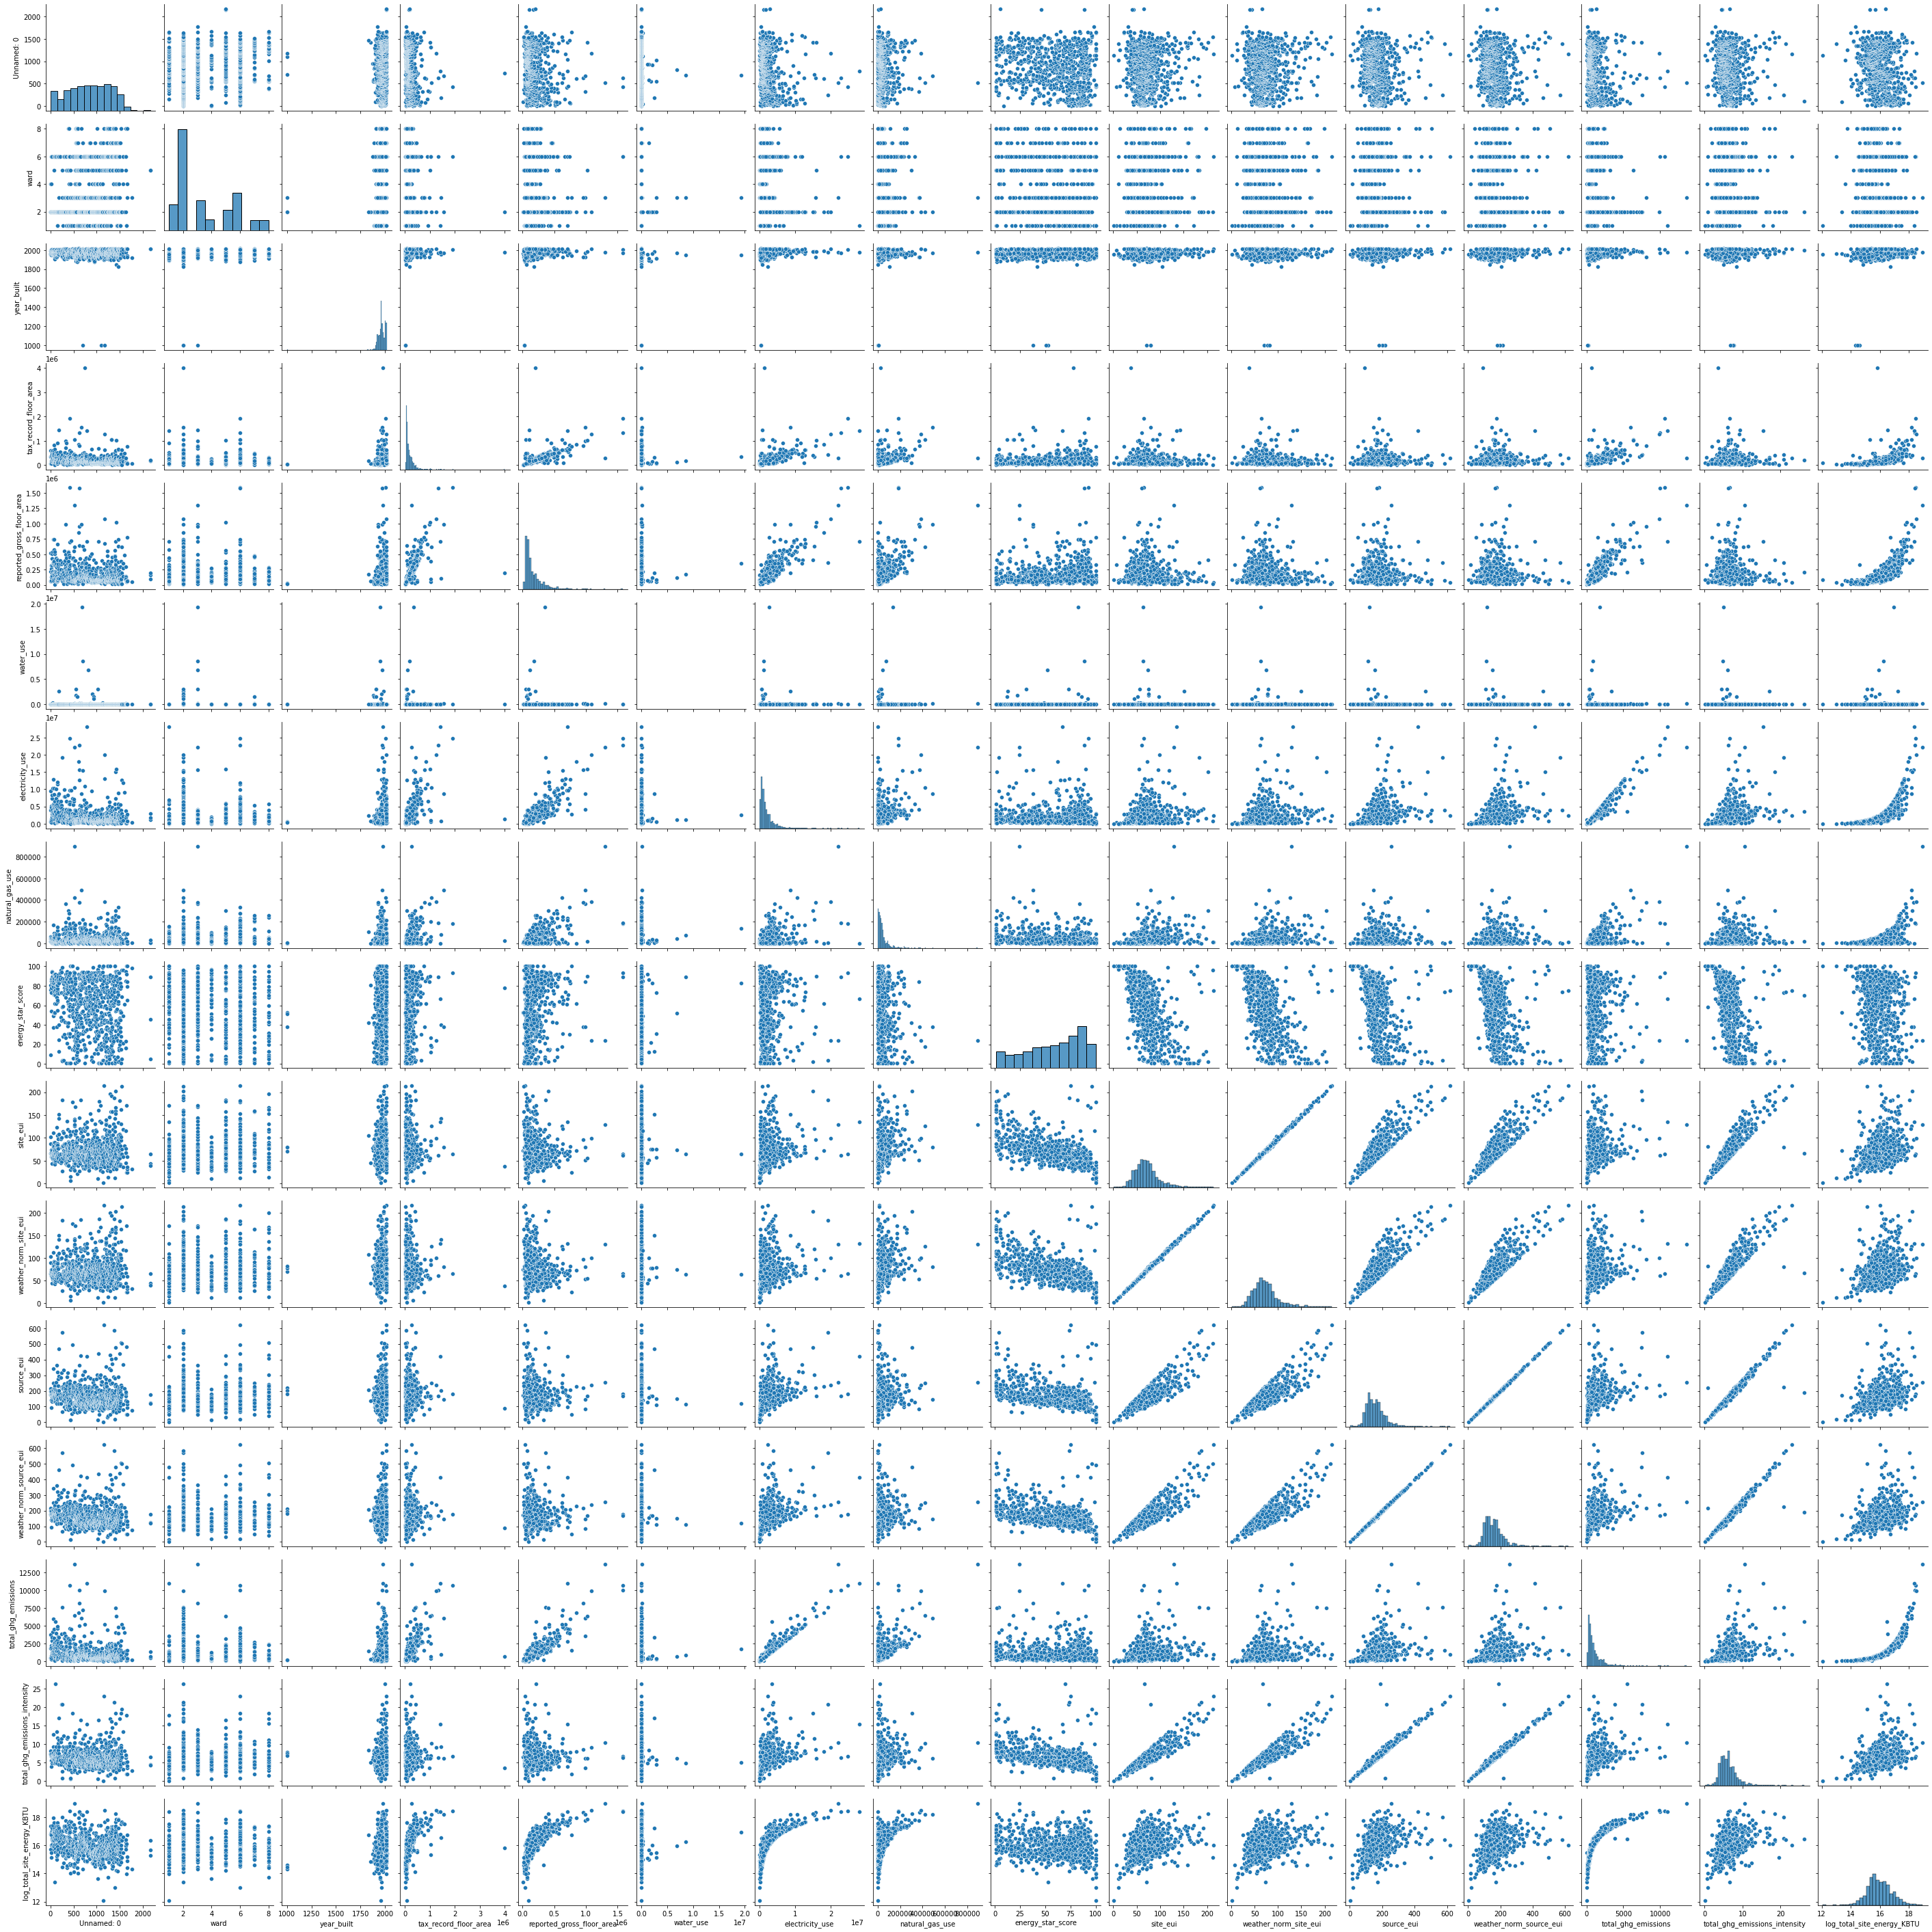

In [40]:
sns.pairplot(WDCX_numeric_data)

In [41]:
#plt.

In [45]:
print("The dataset has {} festures".format(PX.shape[1]))

The dataset has 40 festures


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X)

In [ ]:
#feature_name_cat = ohe.get_feature_names_out()
#feature_name_cat

In [ ]:
#columns = np.concatenate([X_numeric_data.columns, feature_name_cat])
#columns

In [ ]:
#from colorsys import yiq_to_rgb
#fig
#ax.set_yticklabels(feature_names[sorted])

#fig.tight_layout()
#ax.set_ylim(90, len(colummns))
#plt.show()